In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix, confusion_matrix
from sklearn.metrics import roc_curve, auc #roc_auc_curve

In [1]:
from main import *

In [2]:
df3.head()

,id_producto,label,Rubro1_Artículos de electrónica,Rubro1_Artículos de fabricación y producción,Rubro1_Artículos eléctricos y de iluminación,"Rubro1_Artículos para estructuras, obras y construcciones",Rubro1_Artículos para plantas y animales,"Rubro1_Combustibles, lubricantes y anticorrosivos",Rubro1_Consultoria,"Rubro1_Educación, formación, entrenamiento y capacitación",...,PC1990,PC1991,PC1992,PC1993,PC1994,PC1995,PC1996,PC1997,PC1998,PC1999
0,2792-88-LE21-1,0,0,0,0,0,0,0,0,0,...,-0.002384,0.002807,-0.001538,-0.003709,-0.002591,0.000440,0.002250,0.000467,0.000639,-0.001872
1,1704-52-LP21-1,0,0,0,0,0,0,0,0,0,...,-0.008658,0.027708,-0.008032,-0.018378,0.017792,-0.008448,-0.025804,-0.004466,-0.015323,0.027681
2,1003-20-L121-1,0,0,0,0,0,0,0,0,0,...,0.000625,0.001980,0.000885,-0.003826,-0.000925,0.011832,0.003672,0.003602,-0.015482,-0.003578
3,4236-21-L121-1,0,0,0,0,0,0,0,0,0,...,-0.001726,0.001224,-0.015686,0.014348,-0.003762,-0.003359,-0.006658,0.019041,-0.004452,-0.003956
4,4236-21-L121-2,0,0,0,0,0,0,0,0,0,...,-0.025076,0.037415,0.003010,-0.006691,-0.000038,-0.009452,-0.023864,-0.007695,0.005932,-0.017173


In [7]:
X = df3.drop(columns=['id_producto','label'], axis=1)
Y = df3['label']
X_train, X_test, y_train, y_test = train_test_split(
    X, Y, test_size=0.33, random_state=42)

In [8]:
clf = LogisticRegression(solver='lbfgs') # la forma del GD
clf = clf.fit(X_train, y_train)
Y_pred = clf.predict(X_test)
probs = clf.predict_proba(X_test)

C:\Users\metal\AppData\Roaming\Python\Python310\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [9]:
accuracy_score(y_test,Y_pred)

0.9511264961276695

In [10]:
Y_pred_train = clf.predict(X_train)
accuracy_score(y_train,Y_pred_train)

0.9586151089532396

In [11]:
cfm = confusion_matrix(Y_pred, y_test)
cfm

array([[15027,   600],
       [  233,  1184]], dtype=int64)

In [12]:
fpr, tpr, threshold = metrics.roc_curve(y_test, probs[:,1])
roc_auc = metrics.auc(fpr, tpr)
print(roc_auc)

0.9753490323187324


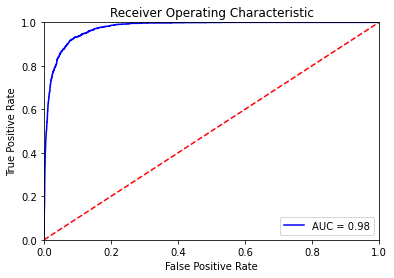

In [14]:
plt.title('Receiver Operating Characteristic')
plt.plot(fpr, tpr, 'b', label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()